In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 3, 3])


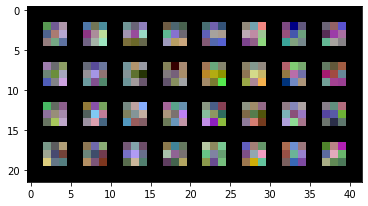

In [31]:
modelname = 'efficientNetb0-FullDataAugmentation-512-retrainedv4_clahe'
PATH = f'models/{modelname}'
Mynet = torch.load(PATH,map_location=torch.device('cpu'))
filter = Mynet.features[0][0].weight.cpu().data
filter = (1/(2*filter.max()))*filter + 0.5 #Normalizing the values to [0,1]
print(filter.shape)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(filter))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 3, 3])


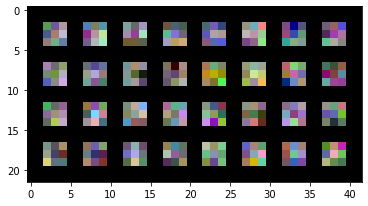

In [32]:
modelname = 'efficientNetb0-FullDataAugmentation-512-retrainedv3_clahe'
PATH = f'models/{modelname}'
Mynet = torch.load(PATH,map_location=torch.device('cpu'))
filter = Mynet.features[0][0].weight.cpu().data
filter = (1/(2*filter.max()))*filter + 0.5 #Normalizing the values to [0,1]
print(filter.shape)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(filter))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 3, 3])


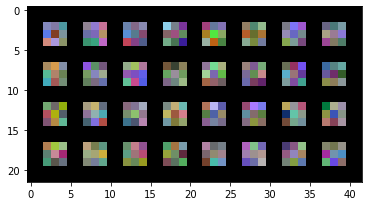

In [49]:
modelname = 'efficientNetb0-conservative_clahe_from_pretrained'
PATH = f'models/{modelname}'
Mynet = torch.load(PATH,map_location=torch.device('cpu'))
filter = Mynet.features[0][0].weight.cpu().data
filter = (1/(2*filter.max()))*filter + 0.5 #Normalizing the values to [0,1]
print(filter.shape)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(filter))

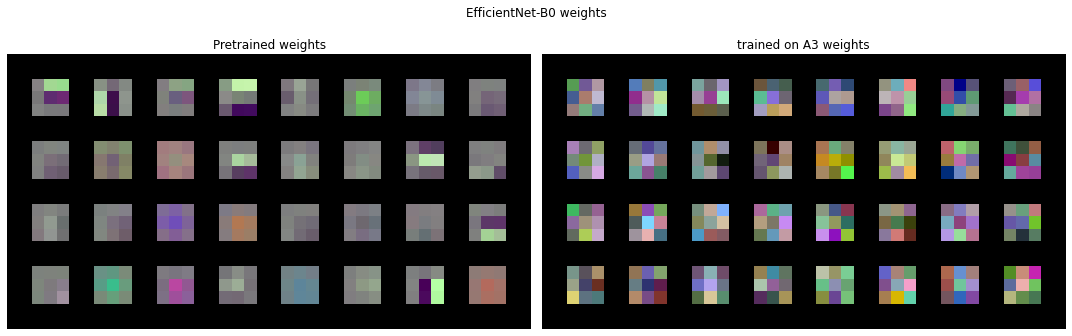

In [2]:
def get_weights_effnetb0(net):
    filter_net = net.features[0][0].weight.cpu().data
    filter_net = (1/(2*filter_net.max()))*filter_net + 0.5 #Normalizing the values to [0,1]
    return filter_net

Mynet = torchvision.models.efficientnet_b0(pretrained=True) 
filter = get_weights_effnetb0(Mynet)

modelname = 'efficientNetb0-FullDataAugmentation-512-retrainedv3_clahe'
PATH = f'models/{modelname}'
Mynet = torch.load(PATH,map_location=torch.device('cpu'))

filter_mine = get_weights_effnetb0(Mynet)

def imshow_compare(img1,img2):
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    npimg1 = img1.numpy()
    npimg2 = img2.numpy()
    ax1.imshow(np.clip(np.transpose(npimg1, (1, 2, 0)),0,1))
    ax2.imshow(np.clip(np.transpose(npimg2, (1, 2, 0)),0,1))
    ax1.axis("off")
    ax2.axis("off")
    ax1.set_title("Pretrained weights")
    ax2.set_title("trained on A3 weights")
    
    plt.suptitle("EfficientNet-B0 weights")
    plt.tight_layout()
    plt.savefig("figures/Weights1")
    plt.show()
imshow_compare(torchvision.utils.make_grid(filter),torchvision.utils.make_grid(filter_mine))